<html><h1><center style="color:blue">Personalized Fitness Recommendation System Based on Human Activity Recognition and Daily Health Metrics</center></h1></html> .


In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [2]:
df.shape


(7352, 564)

In [3]:
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [4]:
df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
ActivityName         0
Length: 564, dtype: int64

In [5]:
df.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


<html><h1><center style="color:yellow">BAR CHART</center></h1></html> .


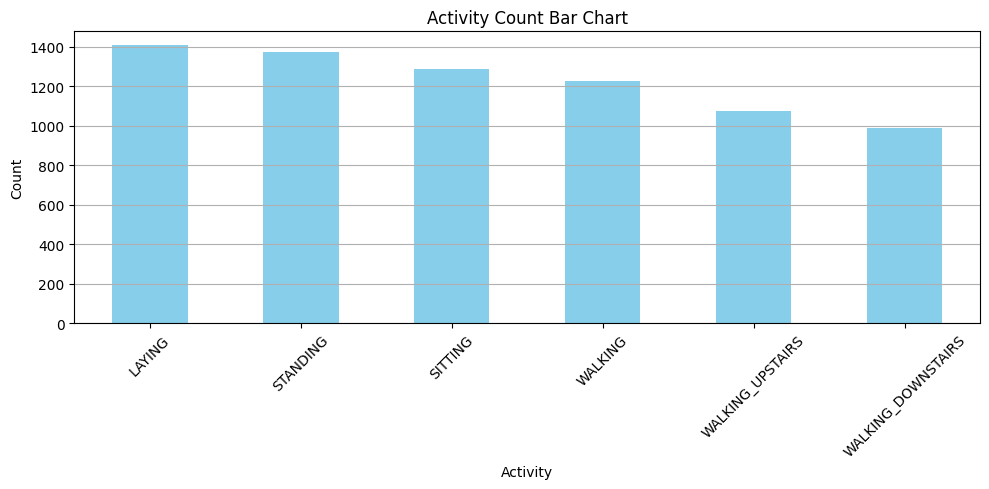

In [6]:
activity_counts = df["ActivityName"].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
activity_counts.plot(kind="bar", color="skyblue")
plt.title("Activity Count Bar Chart")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<html><h1><center style="color:yellow">HEATMAP</center></h1></html> .


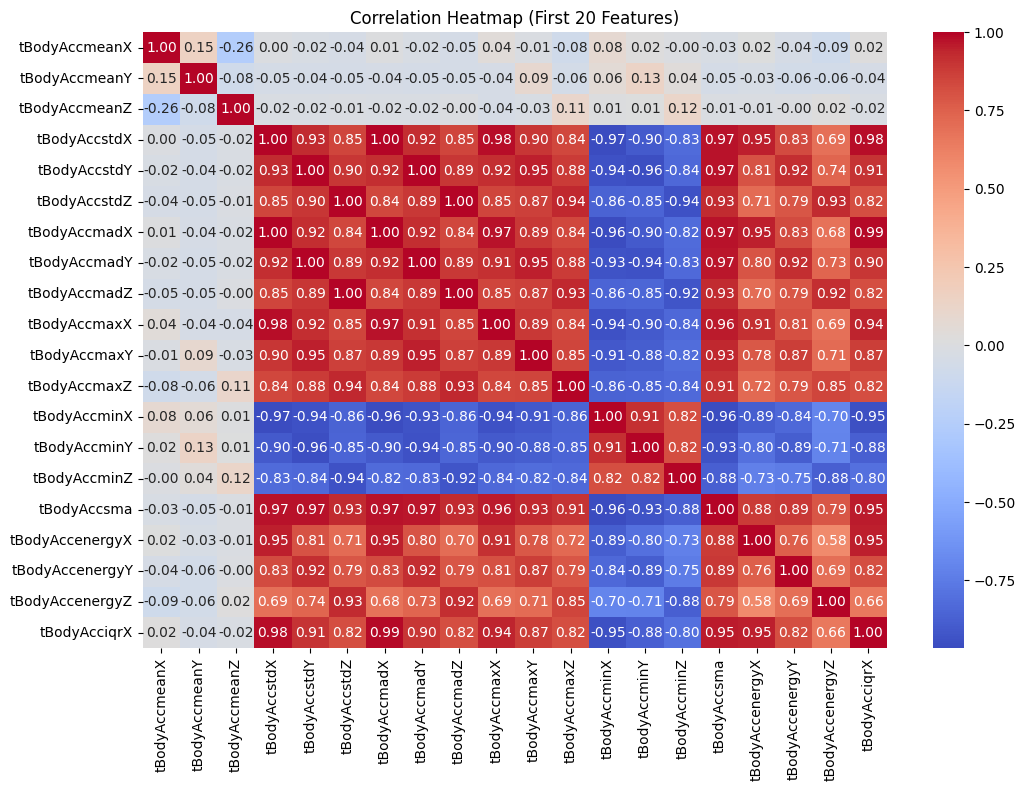

In [7]:
import seaborn as sns
X = df.drop(columns=['subject', 'Activity', 'ActivityName'])
plt.figure(figsize=(12, 8))
corr = X.iloc[:, :20].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (First 20 Features)")
plt.show()



<html><h1><center style="color:yellow">FEATURE DISTRIBUATION</center></h1></html> .


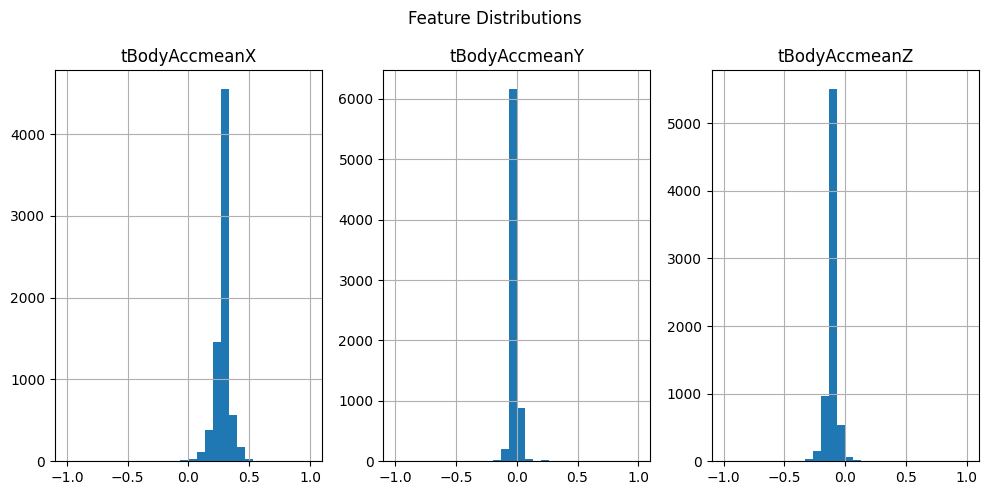

In [8]:
selected_features = ["tBodyAccmeanX", "tBodyAccmeanY", "tBodyAccmeanZ"]
df[selected_features].hist(bins=30, figsize=(10, 5), layout=(1, 3))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

<html><h1><center style="color:yellow">BOXPLOT</center></h1></html> .


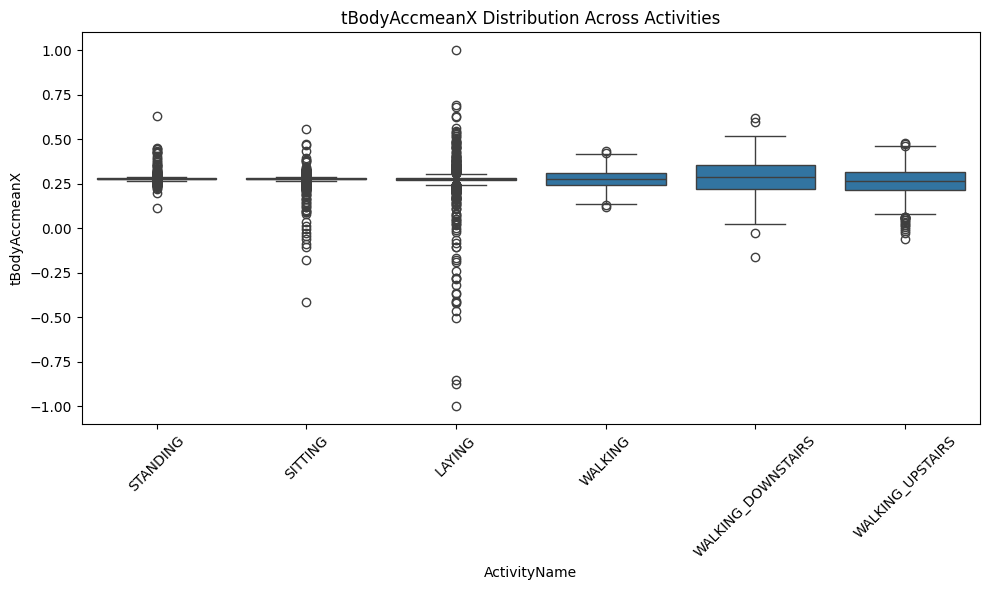

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ActivityName", y="tBodyAccmeanX")
plt.xticks(rotation=45)
plt.title("tBodyAccmeanX Distribution Across Activities")
plt.tight_layout()
plt.show()


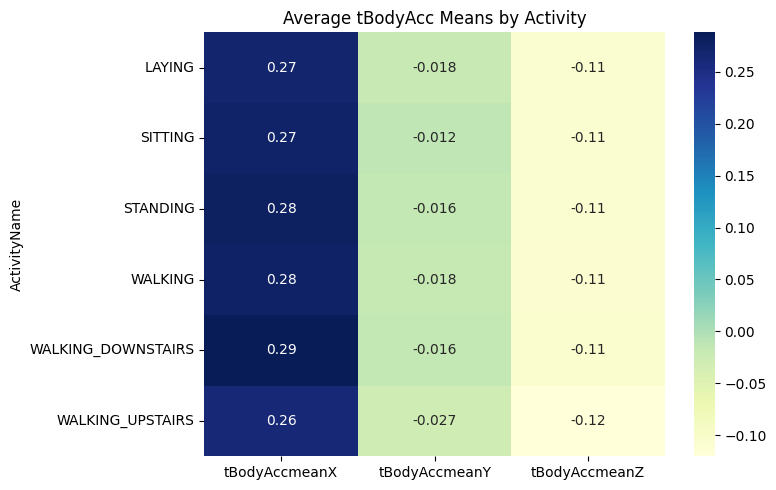

In [10]:
activity_means = df.groupby("ActivityName")[["tBodyAccmeanX", "tBodyAccmeanY", "tBodyAccmeanZ"]].mean()
plt.figure(figsize=(8, 5))
sns.heatmap(activity_means, annot=True, cmap="YlGnBu")
plt.title("Average tBodyAcc Means by Activity")
plt.tight_layout()
plt.show()


<html><h1><center style="color:yellow">HISTOGRAM</center></h1></html> .


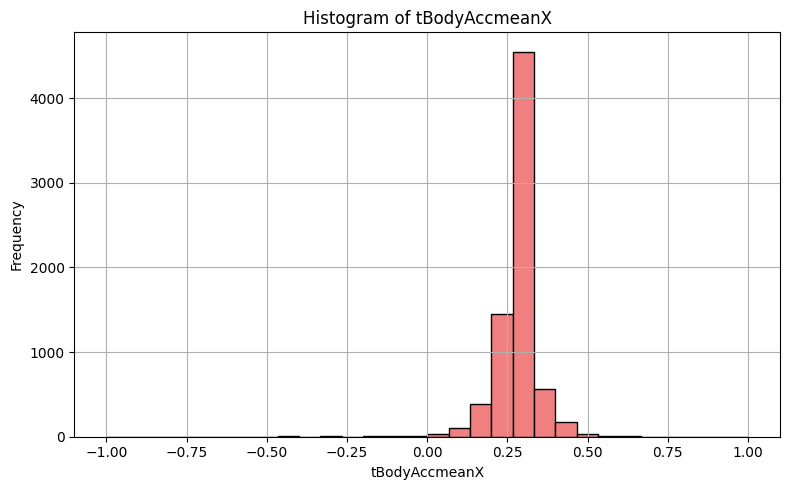

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df["tBodyAccmeanX"], bins=30, color="lightcoral", edgecolor="black")
plt.title("Histogram of tBodyAccmeanX")
plt.xlabel("tBodyAccmeanX")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


<html><h1><center style="color:yellow">SCATTER PLOT</center></h1></html> .


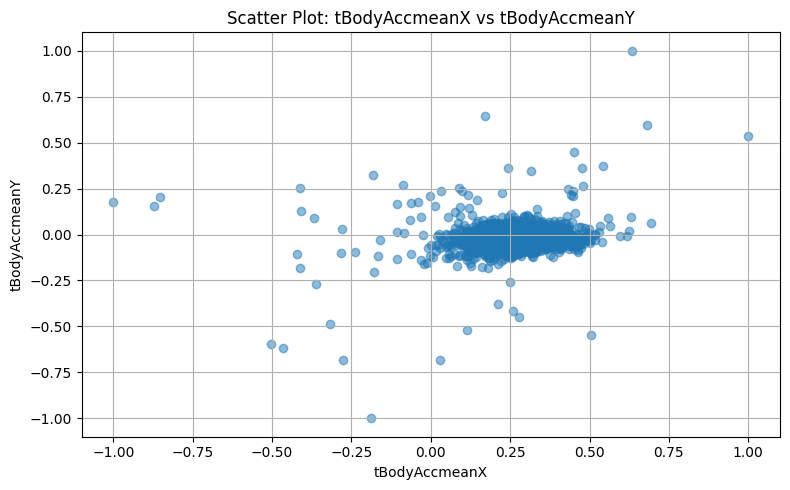

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df["tBodyAccmeanX"], df["tBodyAccmeanY"], alpha=0.5)
plt.title("Scatter Plot: tBodyAccmeanX vs tBodyAccmeanY")
plt.xlabel("tBodyAccmeanX")
plt.ylabel("tBodyAccmeanY")
plt.grid(True)
plt.tight_layout()
plt.show()


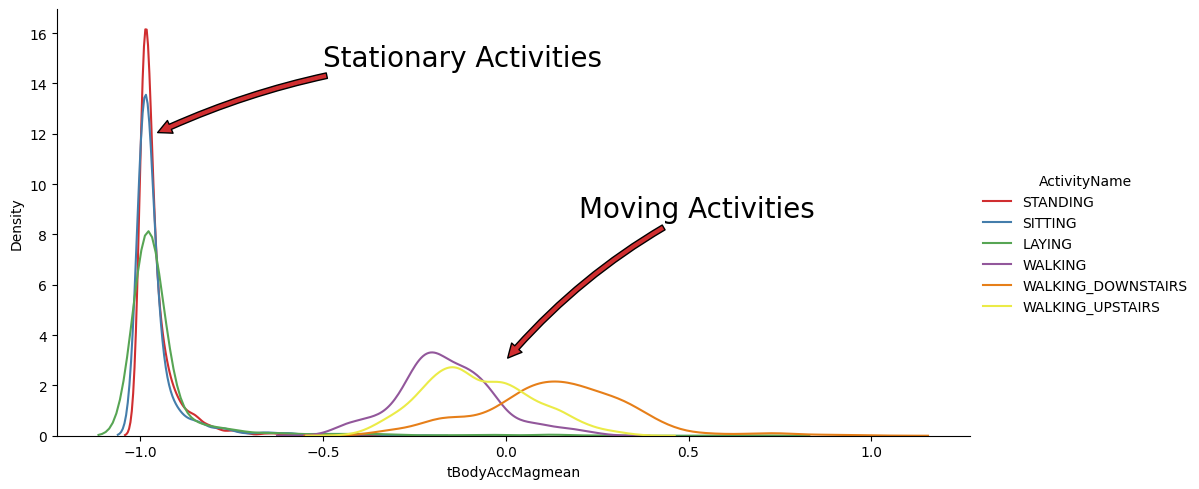

In [16]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='ActivityName', height=5, aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean').add_legend()
plt.annotate("Stationary Activities", xy=(-0.960, 12), xytext=(-0.5, 15), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))
plt.show()

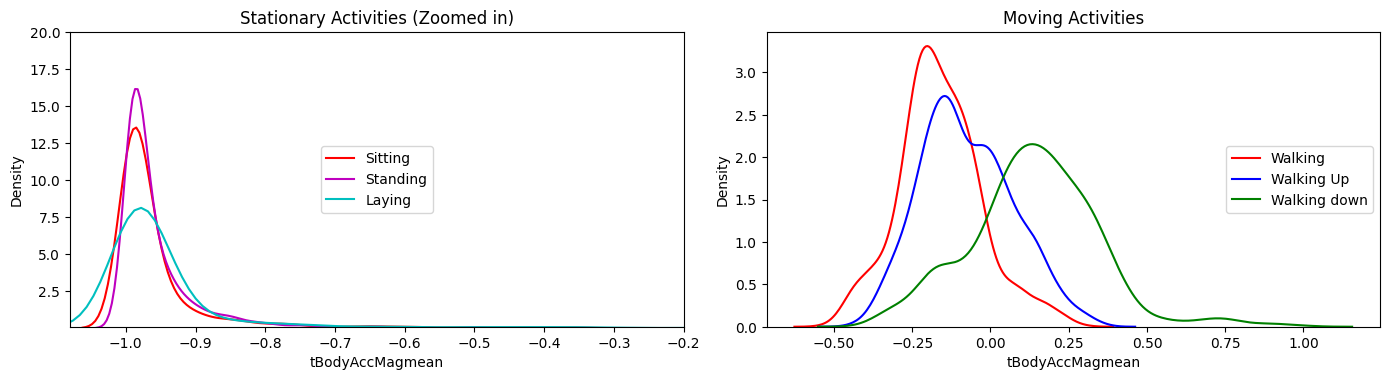

In [20]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = df[df['Activity'] == 1]
df2 = df[df['Activity'] == 2]
df3 = df[df['Activity'] == 3]
df4 = df[df['Activity'] == 4]
df5 = df[df['Activity'] == 5]
df6 = df[df['Activity'] == 6]

plt.figure(figsize=(14,7))

# Stationary Activities (Zoomed in)
plt.subplot(2,2,1)
plt.title('Stationary Activities (Zoomed in)')
sns.kdeplot(df4['tBodyAccMagmean'], color='r', label='Sitting')
sns.kdeplot(df5['tBodyAccMagmean'], color='m', label='Standing')
sns.kdeplot(df6['tBodyAccMagmean'], color='c', label='Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

# Moving Activities
plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMagmean'], color='red', label='Walking')
sns.kdeplot(df2['tBodyAccMagmean'], color='blue', label='Walking Up')
sns.kdeplot(df3['tBodyAccMagmean'], color='green', label='Walking down')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

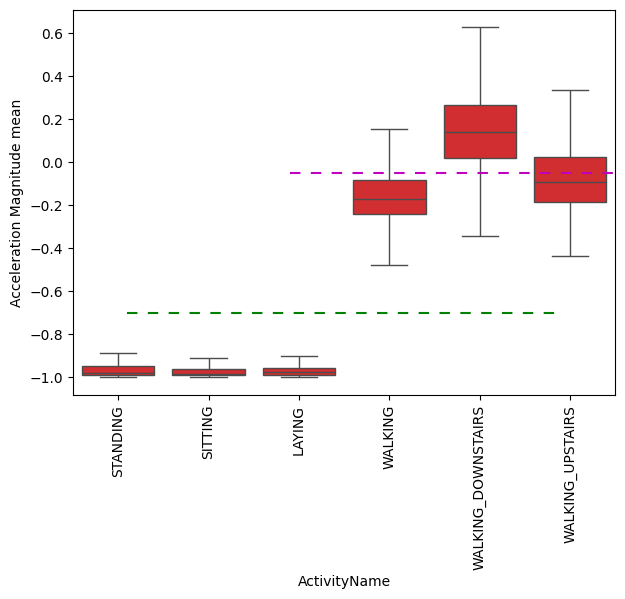

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean', data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

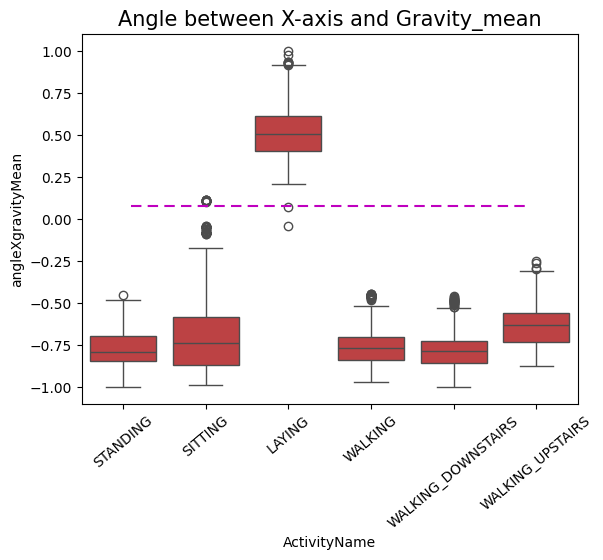

In [24]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)
plt.show()

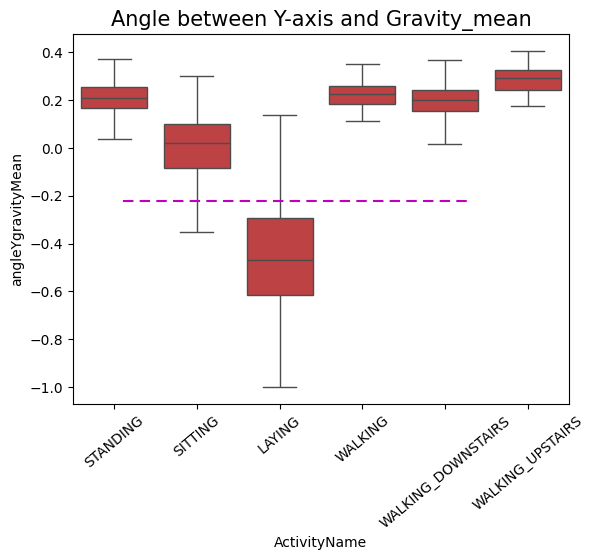

In [26]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data=df, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [27]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.058s...
[t-SNE] Computed neighbors for 7352 samples in 1.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 119.3396072, gradient norm = 0.0438141 (50 iterations in 2.079s)
[t-SNE] Iteration 100: error = 105.1703339, gradient norm = 0.0222657 (50 iterations in 

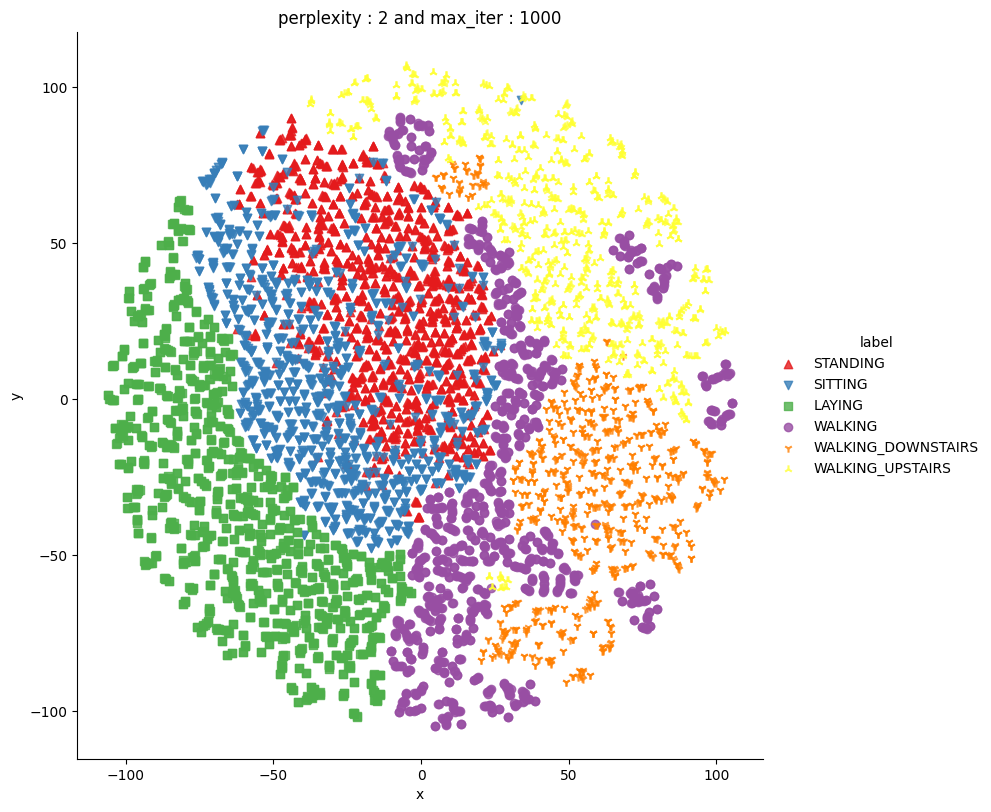

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 1.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 107.1628494, gradient norm = 0.0393847 (50 iterations in 2.045s)
[t-SNE] Iteration 100: error = 95.6919022, gradient norm = 0.0143431 (50 iteration

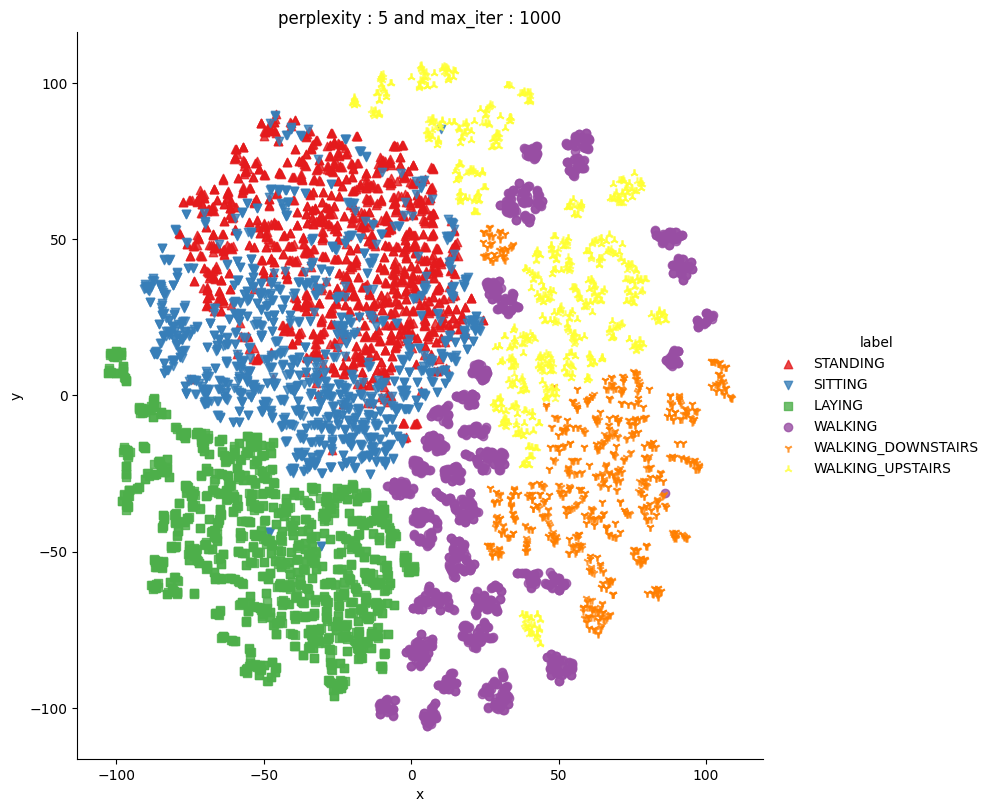

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 1.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 97.8969574, gradient norm = 0.0358544 (50 iterations in 2.086s)
[t-SNE] Iteration 100: error = 88.9355240, gradient norm = 0.0108100 (50 iteration

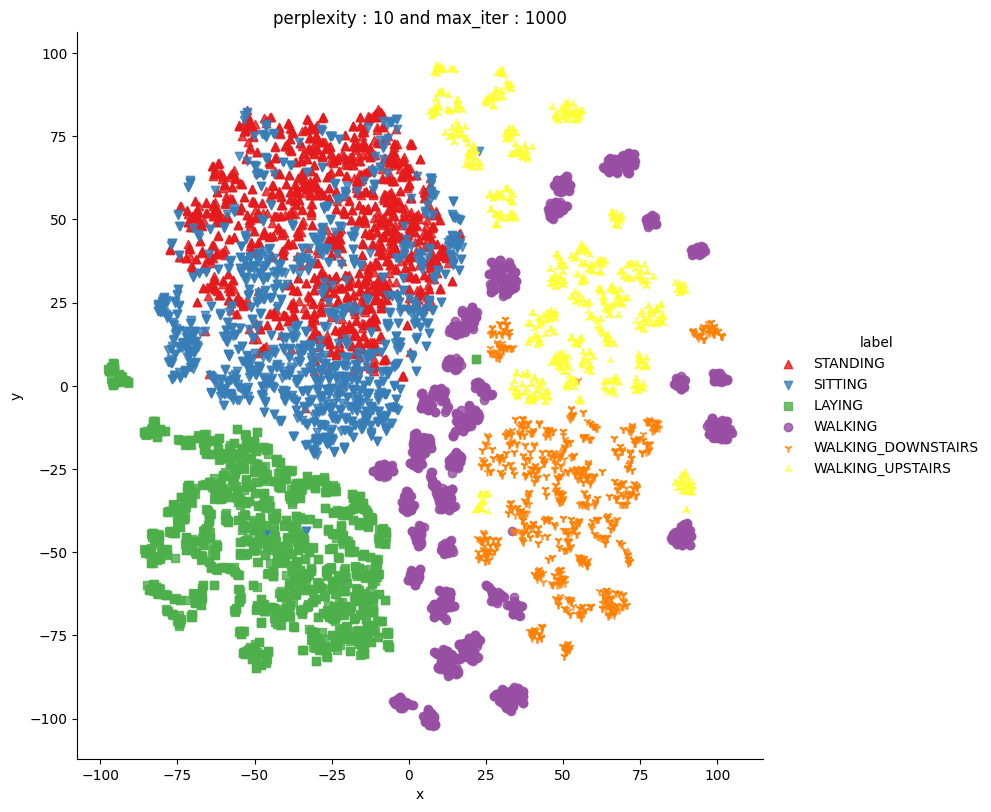

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 1.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.149s
[t-SNE] Iteration 50: error = 89.2930069, gradient norm = 0.0294447 (50 iterations in 2.394s)
[t-SNE] Iteration 100: error = 82.9687576, gradient norm = 0.0077036 (50 iteration

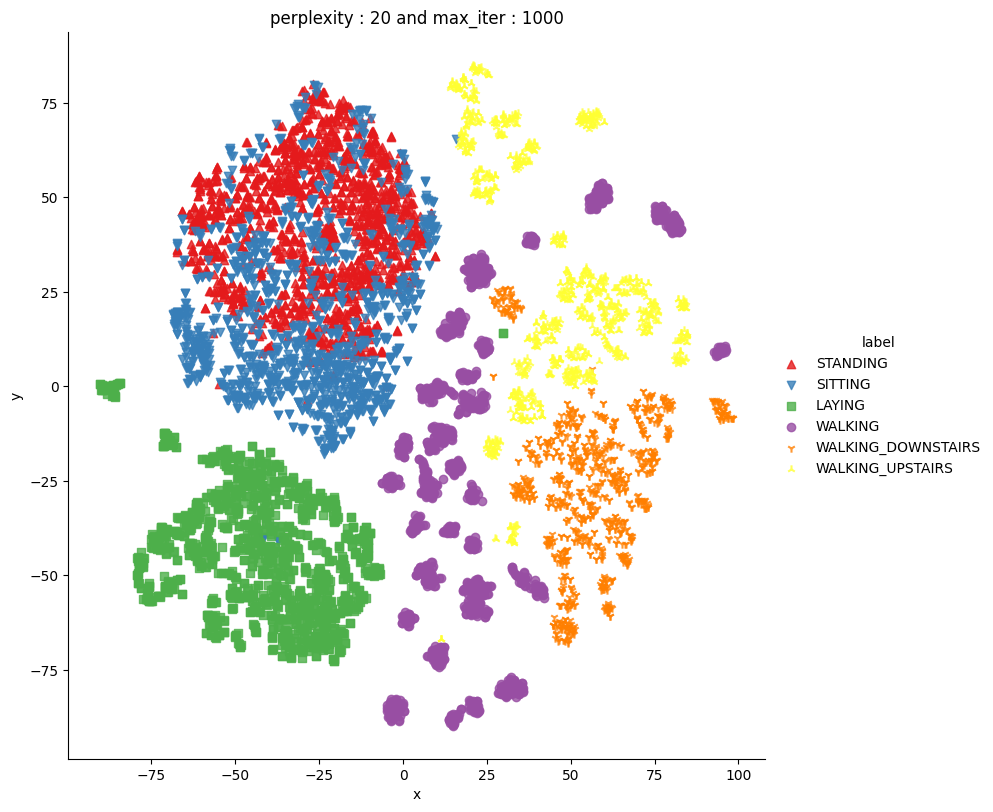

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 1.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.315s
[t-SNE] Iteration 50: error = 78.8786697, gradient norm = 0.0244908 (50 iterations in 3.580s)
[t-SNE] Iteration 100: error = 75.2911530, gradient norm = 0.0056082 (50 iteratio

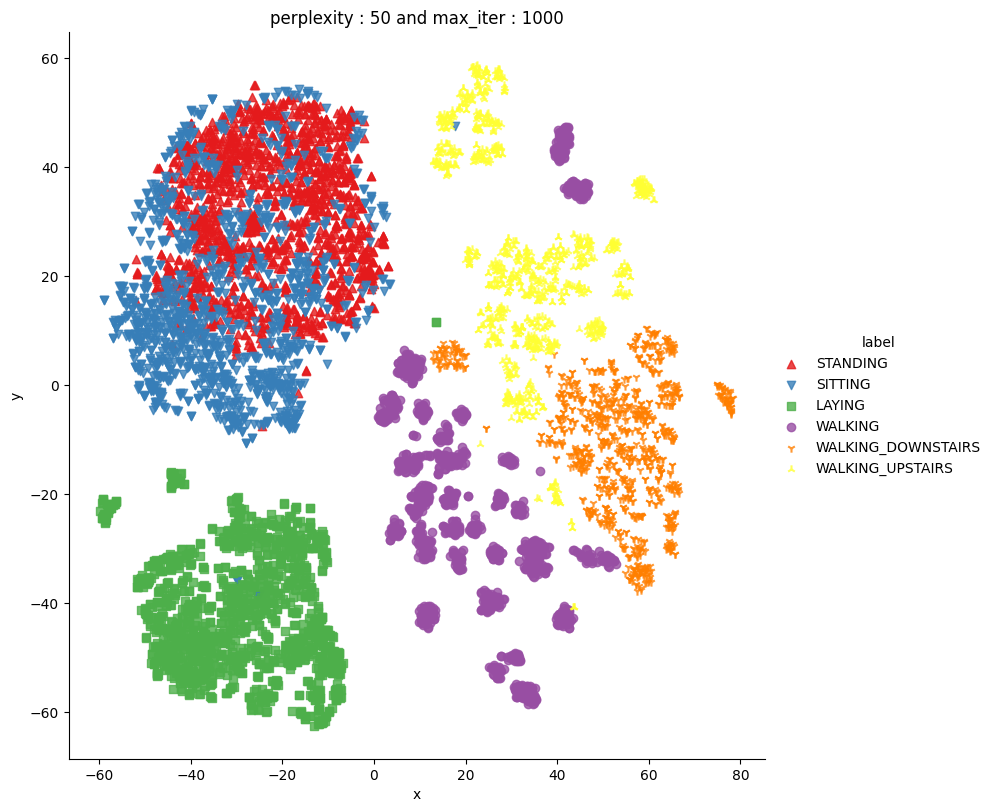

Done


In [30]:
X_pre_tsne = df.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_pre_tsne = df['ActivityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2, 5, 10, 20, 50])

<html><h1><center style="color:yellow">DATA CLEANING</center></h1></html> .


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")  

print("Missing values per column:\n", df.isnull().sum())

print("Number of duplicate rows:", df.duplicated().sum())

df_cleaned = df.drop_duplicates()

df_cleaned = df_cleaned.dropna()

df_cleaned.to_csv("train_cleaned.csv", index=False)

print("Cleaned data shape:", df_cleaned.shape)

print("Cleaned data saved to 'train_cleaned.csv'")


Missing values per column:
 tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
ActivityName         0
Length: 564, dtype: int64
Number of duplicate rows: 0
Cleaned data shape: (7352, 564)
Cleaned data saved to 'train_cleaned.csv'


<html><h1><center style="color:yellow">DATA PREPROCESSING</center></h1></html> .


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_cleaned.drop(columns=['Activity', 'ActivityName', 'subject'])
y = df_cleaned['ActivityName']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and label split
X = df.drop(columns=['subject', 'Activity', 'ActivityName'])
y = df['ActivityName']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<html><h1><center style="color:yellow">RANDOM FOREST AND CONFUSION MATRIX</center></h1></html> .


Random Forest Accuracy: 0.9843643779741672
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.98      0.95      0.96       257
          STANDING       0.95      0.98      0.97       275
           WALKING       1.00      0.99      0.99       245
WALKING_DOWNSTAIRS       0.98      0.99      0.99       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



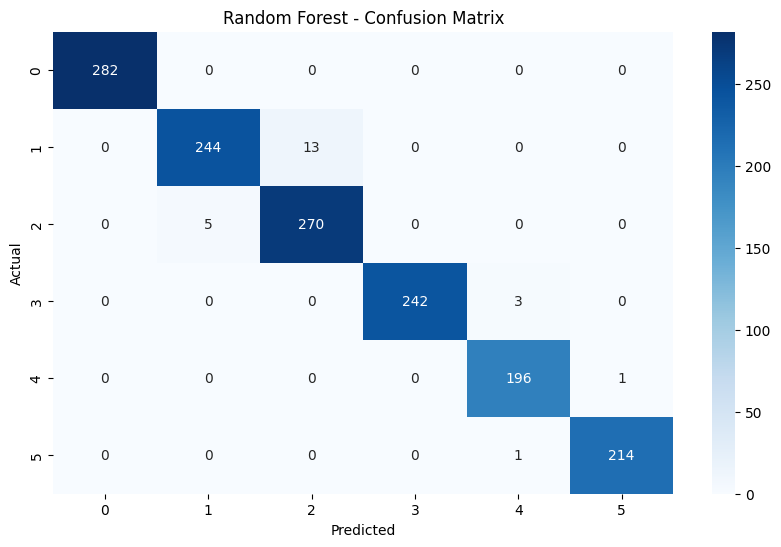

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")  

# Feature and label split
X = df.drop(columns=["Activity", "ActivityName", "subject"])
y = df["ActivityName"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model Training and Prediction
rf = RandomForestClassifier(
	n_estimators=100,
	random_state=42,
	min_samples_leaf=2,
	max_features='sqrt'
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Splitting training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_split, y_train_split)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluation on validation set
y_pred_best = best_model.predict(X_val_split)
print("Tuned Model Accuracy:", accuracy_score(y_val_split, y_pred_best))
print("Classification Report (Tuned Model):")
print(classification_report(y_val_split, y_pred_best, target_names=le.classes_))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 0.9796091758708582
Classification Report (Tuned Model):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       225
           SITTING       0.98      0.94      0.96       206
          STANDING       0.95      0.98      0.96       220
           WALKING       1.00      0.99      0.99       196
WALKING_DOWNSTAIRS       0.97      0.98      0.98       158
  WALKING_UPSTAIRS       0.98      0.98      0.98       172

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177



In [ ]:
import joblib
# Saving the best (tuned) Random Forest model
joblib.dump(best_model, "rf_model_tuned.pkl")

['rf_model_tuned.pkl']

In [ ]:
import joblib
joblib.dump(rf, 'activity_rf_model.pkl')  
joblib.dump(scaler, 'scaler.pkl')  



['scaler.pkl']

<html><h1><center style="color:blue"> Deep Learning Section</center></h1></html> .


In [ ]:
%pip install tensorflow
import joblib   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
model_dl = Sequential()
model_dl.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model_dl.add(Dropout(0.3))
model_dl.add(Dense(64, activation='relu'))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(y_train_encoded.shape[1], activation='softmax'))
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dl.summary()
joblib.dump(le, 'label_encoder.pkl')




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SHREYAS KUMAR JENA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\SHREYAS KUMAR JENA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Note: you may need to restart the kernel to use updated packages.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        71,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

['label_encoder.pkl']

In [ ]:
history = model_dl.fit(X_train_scaled, y_train_encoded, 
                       validation_split=0.2,
                       epochs=25, batch_size=64, verbose=1)


Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5529 - loss: 1.0924 - val_accuracy: 0.9227 - val_loss: 0.2080
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8956 - loss: 0.2656 - val_accuracy: 0.9490 - val_loss: 0.1353
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9356 - loss: 0.1670 - val_accuracy: 0.9660 - val_loss: 0.0927
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9479 - loss: 0.1324 - val_accuracy: 0.9754 - val_loss: 0.0761
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9558 - loss: 0.1250 - val_accuracy: 0.9677 - val_loss: 0.0827
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9581 - loss: 0.1014 - val_accuracy: 0.9720 - val_loss: 0.0733
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9676 - loss: 0.0831 - val_accuracy: 0.9754 - val_loss: 0.0678
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9705 - loss: 0.0717 - val_accuracy: 0.9779 - val_loss

In [ ]:
# Model Evaluation
loss, accuracy = model_dl.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {accuracy:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0539 
Test Accuracy: 0.9823


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_pred_dl = model_dl.predict(X_test_scaled)
y_pred_labels = le.inverse_transform(np.argmax(y_pred_dl, axis=1))
print(classification_report(y_test, y_pred_labels))


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.98      0.92      0.95       257
          STANDING       0.93      0.98      0.96       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



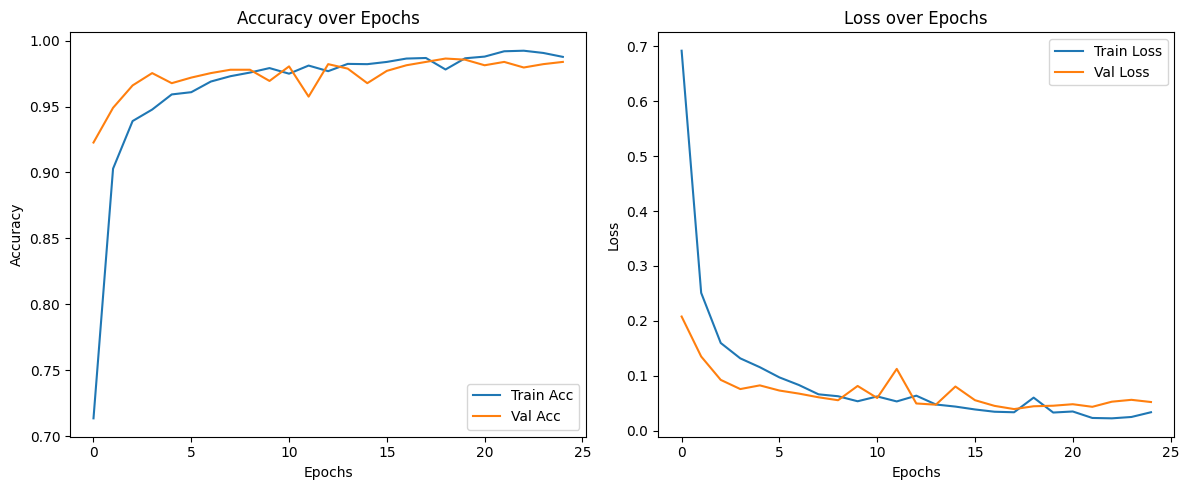

In [ ]:
# Accuracy and loss curves
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

model_dl.save('activity_dl_model.h5')


In [ ]:

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

# Model Training
history_lstm = model_lstm.fit(X_train_lstm, y_train_encoded, 
                              validation_split=0.2,
                              epochs=25, batch_size=64, verbose=1)


C:\Users\SHREYAS KUMAR JENA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │       160,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,534 (634.90 KB)

 Trainable params: 162,534 (634.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6327 - loss: 1.0632 - val_accuracy: 0.9108 - val_loss: 0.3111
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9214 - loss: 0.2703 - val_accuracy: 0.9439 - val_loss: 0.1495
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9507 - loss: 0.1450 - val_accuracy: 0.9592 - val_loss: 0.1052
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9586 - loss: 0.1132 - val_accuracy: 0.9669 - val_loss: 0.0956
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9725 - loss: 0.0786 - val_accuracy: 0.9737 - val_loss: 0.0683
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9783 - loss: 0.0694 - val_accuracy: 0.9703 - val_loss: 0.0912
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9805 - loss: 0.0630 - val_accuracy: 0.9754 - val_loss: 0.0657
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9760 - loss: 0.0624 - val_accuracy: 0.9745 - val_loss

In [ ]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_encoded)
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9850 - loss: 0.0424
LSTM Test Accuracy: 0.9816


In [ ]:
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm_labels = le.inverse_transform(np.argmax(y_pred_lstm, axis=1))
print(classification_report(y_test, y_pred_lstm_labels))


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.94      0.96      0.95       257
          STANDING       0.96      0.94      0.95       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       0.99      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



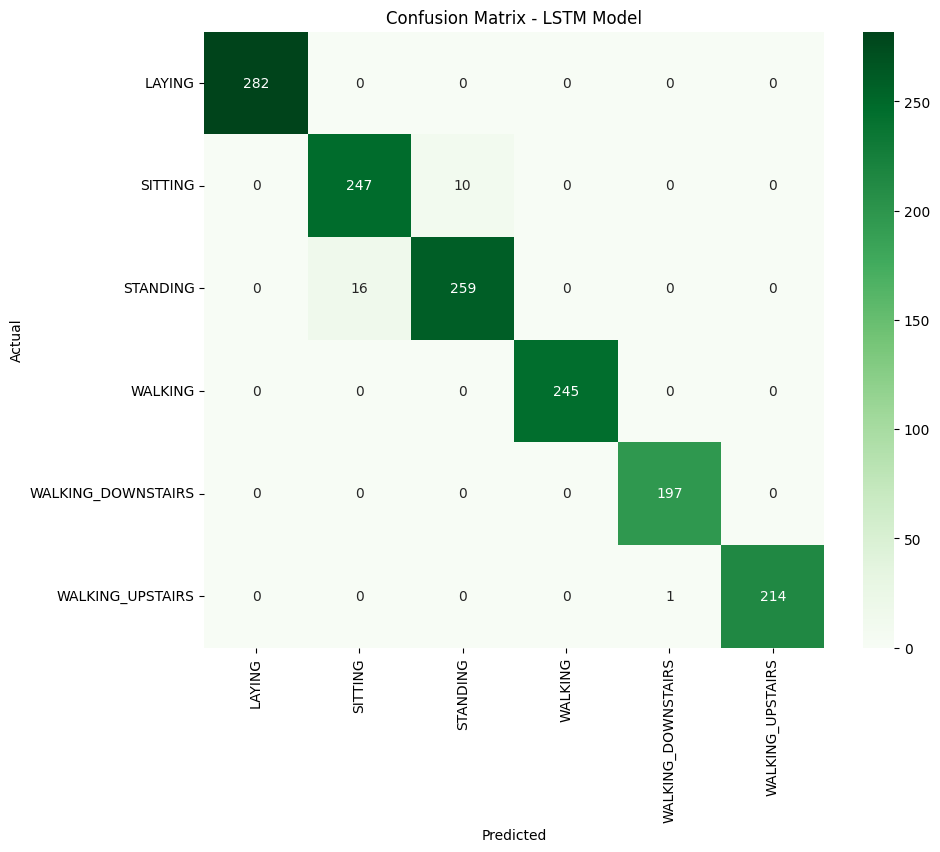

In [ ]:
conf_lstm = confusion_matrix(y_test, y_pred_lstm_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conf_lstm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
model_lstm.save('activity_lstm_model.h5')
